In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as c
import math as m

red='#DD5544'
blue='#0284C0'
folder='C:/Users/jabuk/Documents/jaderka/praktika/prak_9/praktikum/'

In [4]:
files=[
    'sp_500.txt',
    'sp_500-600.txt',
    'sp_550.txt',
    'sp_600-700.txt',
    'sp_700-800.txt',
    'sp_900.txt',
    'sp_pod500.txt'
]


In [5]:
wl_table=[]
in_table=[]

for file in files:
    f= open(folder+file,"r")
    contents=f.readlines()
    wavelength=[]
    intensity=[]

    for line in contents[17:-1]:
        line_split=line[:-2].split('\t')
        line_split[0]=line_split[0].replace(',', '.')
        line_split[1]=line_split[1].replace(',', '.')

        wavelength.append(float(line_split[0]))
        intensity.append(float(line_split[1]))   
    
    wl_table.append(wavelength)
    in_table.append(intensity)

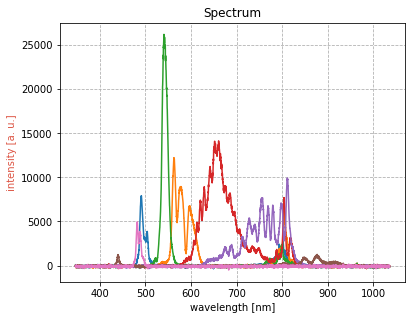

In [6]:

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')
axes.set_title('Spectrum')
axes.set_xlabel('wavelength [nm]')
axes.set_ylabel('intensity [a. u.]', color=red)

for i in range(len(wl_table)):
    axes.plot(wl_table[i], in_table[i])

# fig.savefig(folder+file[:-4]+'.png' , dpi=300,  bbox_inches='tight')
# fig.savefig(folder+'all_peaks.png', dpi=300,  bbox_inches='tight')

In [7]:
lm3=402.5e-9
lm1=450e-9

In [8]:
om3=2*m.pi*c.c/lm3
om1=2*m.pi*c.c/lm1
print(2*m.pi*c.c/(om3-om1)*1e9)

3813.1578947368457


In [9]:
lms=[
    498,
    503,
    520,
    526,
    533,
    542,
    558,
    574,
    586,
    596,
    611,
    622,
    637,
    657,
    670,
    720,
    730
]
lms=[i*1e-9 for i in lms]
ds=[d*1e-4 for d in range(39, 22, -1)]

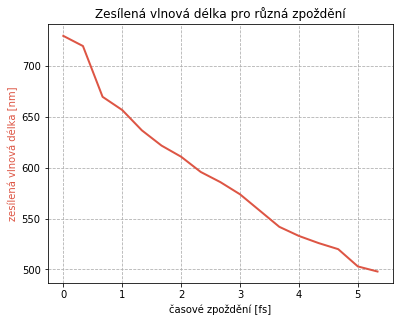

In [10]:

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')
axes.set_title('Zesílená vlnová délka pro různá zpoždění')
axes.set_xlabel('časové zpoždění [fs]')
axes.set_ylabel('zesílená vlnová délka [nm]', color=red)

# axes.plot(lms, ds)
axes.plot([(d-23e-4)/c.c*1e12 for d in ds], [l*1e9 for l in lms], linewidth=2, color=red)



# fig.savefig(folder+file[:-4]+'.png' , dpi=300,  bbox_inches='tight')
# fig.savefig(folder+'zpozdeni.png', dpi=300,  bbox_inches='tight')

In [13]:
GDD=[]
for i in range(len(lms)-1):
    GDD.append((ds[i+1]-ds[i])/c.c/(2*m.pi*c.c/lms[i+1]-2*m.pi*c.c/lms[i])*1e30)
    
TOD=[]
for i in range(len(GDD)-1):
        TOD.append((GDD[i+1]-GDD[i])/(c.c/lms[i+1]-c.c/lms[i])*1e12)

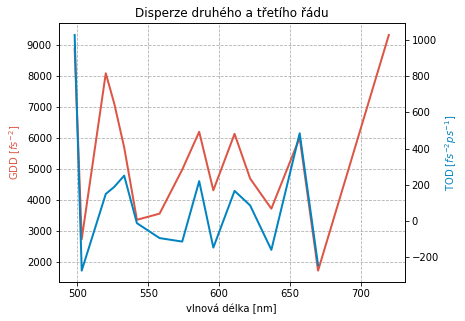

In [15]:

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')
axes.set_title('Disperze druhého a třetího řádu')
axes.set_xlabel('vlnová délka [nm]')
axes.set_ylabel('GDD [$fs^{-2}$]', color=red)
axesI = axes.twinx()
axesI.set_ylabel('TOD [$fs^{-2}ps^{-1}$]', color=blue)

# axes.plot(lms, ds)
axes.plot([l*1e9 for l in lms[:-1]], GDD, linewidth=2, color=red)

axesI.plot([l*1e9 for l in lms[:-2]], TOD, linewidth=2, color=blue)



# fig.savefig(folder+file[:-4]+'.png' , dpi=300,  bbox_inches='tight')
fig.savefig(folder+'disperze.png', dpi=300,  bbox_inches='tight')

In [27]:
16*100/1e6/c.c

5.337025523170433e-12